# Test GEModelTools - HANK

This notebook shows how to **solve a simple Heterogenous Agent New Keynessian (HANK) model** using the `GEModelTools` package.

**The steps of the sequence-space solution method are:**

1. Find the stationary equilibrium (steady state for aggregates and distribution).
2. Compute Jacobians of the household block and the full model (to unknowns and shocks)
3. Find the non-linear transition path or the linearized impulse responses to a given shock path.
4. Simulate the linearized model with aggregate risk

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
import sys
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
#np.set_printoptions(threshold=sys.maxsize)

from HANKmodel import HANKModelClass

# Setup

In [20]:
#print(model)
model = HANKModelClass(name='baseline')
#model.print_unpack_varlist()

# Step 1: Steady state

In [21]:
model.find_ss(do_print=True)

steady state found in 12.2 secs
 Q   =   1.0772
 P   =   1.0578
 Z_N   =   0.5366
 Z_L   =   0.5467
 M_N   =   0.4033
 M_L   =   0.1245
 N_L   =   0.5137
 N_N   =   0.4294
 HH_ell   =   0.9586
 wage N  =   0.2050
 wage L  =   0.1903
 par.varphi   =   1.0000
 par.beta   =   0.9879
Discrepancy in B =   0.00000000
Discrepancy in C =   0.00000000
Discrepancy in C_L =   0.00000000
Discrepancy in C_N =  -0.00000000
Discrepancy in N =   0.00000000


In [22]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [23]:
#print(ss.c_N[0,0,0]/(ss.c_N[0,0,0]+ss.c_L[0,0,0]), ss.c_L[0,0,0]/(ss.c_N[0,0,0]+ss.c_L[0,0,0]))
print(ss.c_N[0,6]/(ss.c_N[0,6]+ss.c_L[0,6]), ss.c_L[0,6]/(ss.c_N[0,6]+ss.c_L[0,6]))
ss.c_N.shape

[0.36912339 0.36911707 0.36911068 0.36910422 0.36909767 0.36909105
 0.36908435 0.36907757 0.36907071 0.36906377 0.36905675 0.36904965
 0.36904246 0.36903518 0.36902782 0.36902037 0.36901284 0.36900521
 0.3689975  0.36898969 0.36898179 0.3689738  0.36896571 0.36895753
 0.36894925 0.36894087 0.3689324  0.36892382 0.36891514 0.36890637
 0.36889748 0.3688885  0.3688794  0.3688702  0.36886089 0.36885147
 0.36884195 0.3688323  0.36882255 0.36881268 0.36880269 0.36879259
 0.36878237 0.36877203 0.36876156 0.36875098 0.36874027 0.36872943
 0.36871847 0.36870738 0.36869616 0.36868481 0.36867332 0.36866171
 0.36864995 0.36863806 0.36862603 0.36861386 0.36860155 0.36858909
 0.36857649 0.36856373 0.36855083 0.36853778 0.36852458 0.36851123
 0.36849772 0.36848405 0.36847022 0.36845624 0.36844208 0.36842777
 0.36841329 0.36839864 0.36838382 0.36836882 0.36835366 0.36833832
 0.3683228  0.3683071  0.36829122 0.36827516 0.36825891 0.36824247
 0.36822585 0.36820903 0.36819202 0.36817481 0.3681574  0.3681

(1, 7, 500)

Text(0, 0.5, '$c_{L,t}$')

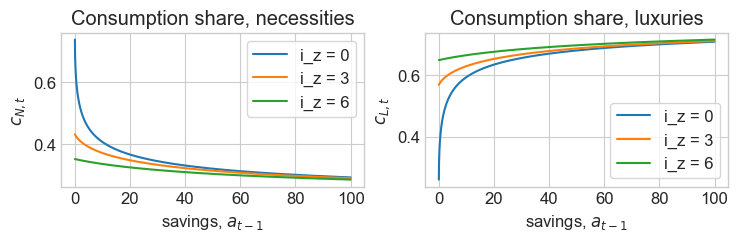

In [24]:
fig = plt.figure(figsize=(18,2),dpi=100)
a_max = 500

# a. necessity consumption share
I = par.a_grid < a_max

ax = fig.add_subplot(1,4,1)
ax.set_title(f'Consumption share, necessities')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c_N[0,i_z,I]/(ss.P*ss.c[0,i_z,I]),label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('$c_{N,t}$')

# a. luxury consumption share
I = par.a_grid < a_max

ax = fig.add_subplot(1,4,2)
ax.set_title(f'Consumption share, luxuries')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.Q*ss.c_L[0,i_z,I]/(ss.P*ss.c[0,i_z,I]),label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('$c_{L,t}$')

# Step 2: Compute Jacobians (incl. tests)

**Household transition path:**

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.8 secs
household problem simulated along transition in 2.3 secs



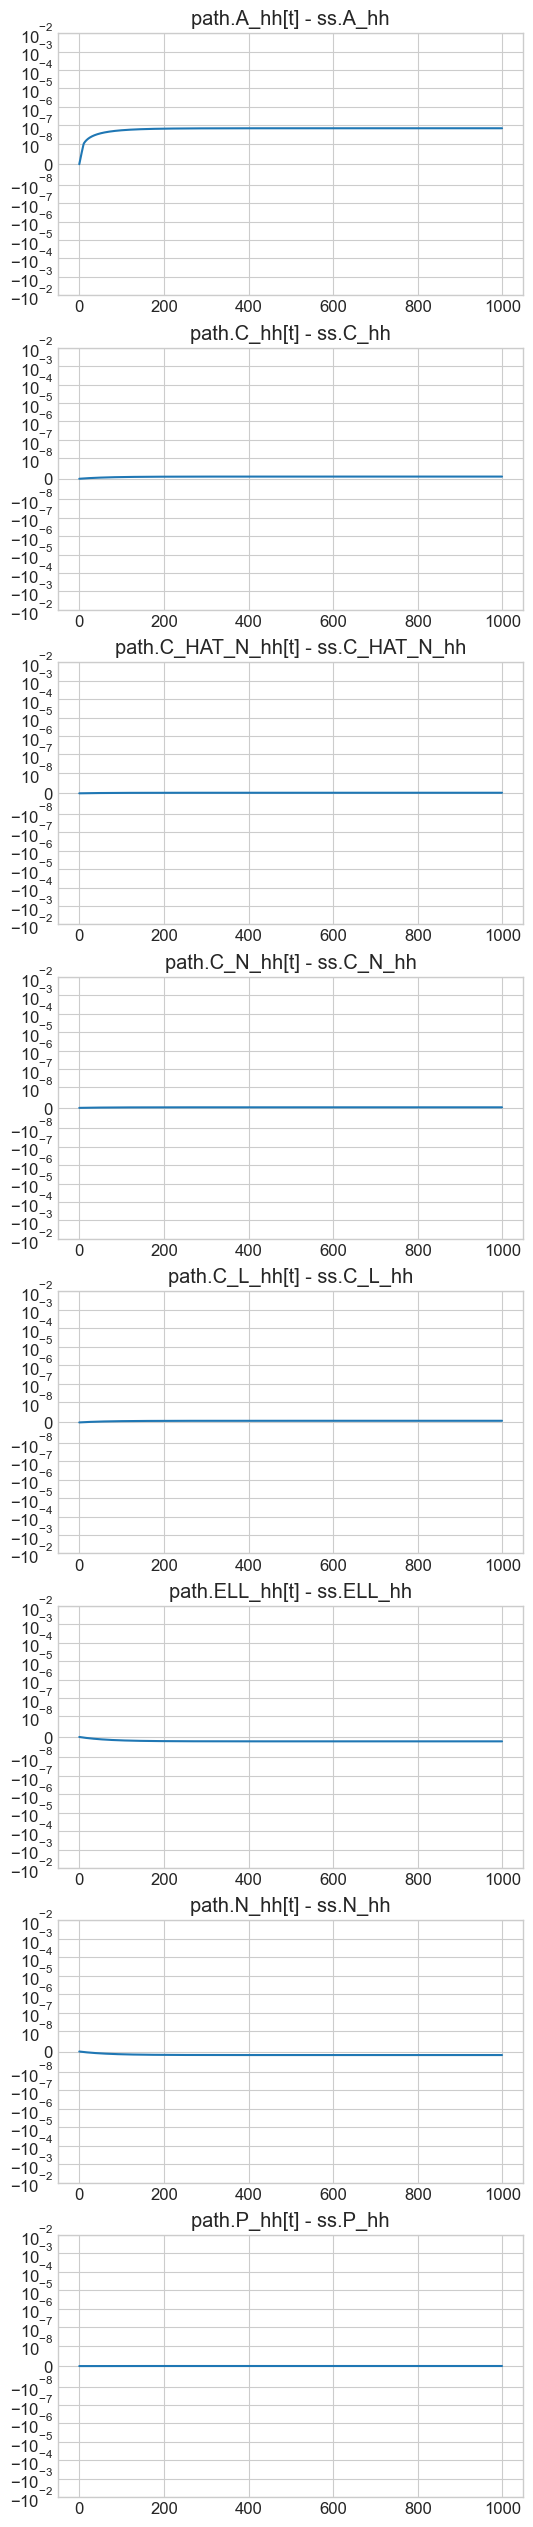

In [26]:
model.test_hh_path()

**Full transition path:**

In [27]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
C              : t0 =  0.0e+00, max abs.  0.0e+00
C_N            : t0 =  0.0e+00, max abs.  0.0e+00
C_L            : t0 =  0.0e+00, max abs.  0.0e+00
d_N            : t0 =  0.0e+00, max abs.  0.0e+00
d_L            : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
N              : t0 =  0.0e+00, max abs.  0.0e+00
N_N            : t0 =  0.0e+00, max abs.  0.0e+00
N_L            : t0 =  0.0e+00, max abs.  0.0e+00
M_N            : t0 =  0.0e+00, max abs.  0.0e+00
M_L            : t0 =  0.0e+00, max abs.  0.0e+00
pm_L           : t0 =  0.0e+00, max abs.  0.0e+00
pm_N           : t0 =  0.0e+00, max abs.  0.0e+00
pi             : t0 =  0.0e+00, max abs.  0.0e+00
pi_N           : t0

In [28]:
model.compute_jacs(do_print=True)
#model.test_jacs(s_list=[50,100,150])

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for P               in 0.9 secs
curly_Y and curly_D calculated for Q               in 1.0 secs
curly_Y and curly_D calculated for d_L             in 0.9 secs
curly_Y and curly_D calculated for d_N             in 0.9 secs
curly_Y and curly_D calculated for r               in 0.9 secs
curly_Y and curly_D calculated for tau             in 1.0 secs
curly_Y and curly_D calculated for w_N             in 0.9 secs
curly_E calculated in 1.9 secs
builiding blocks combined in 2.4 secs
household Jacobian computed in 10.9 secs

full Jacobians:
full Jacobian to unknowns computed in 21.4 secs [in evaluate_path(): 12.4 secs]
full Jacobian to shocks computed in 32.9 secs [in evaluate_path(): 10.7 secs]


# Step 3a: Find non-linear transition path

## Find transition path

In [29]:
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 2.65e-02
   8.04e-03 in NKPC_res_N
   7.22e-04 in NKPC_res_L
   2.65e-02 in clearing_A
   2.00e-03 in clearing_N
   1.00e-02 in clearing_C_N
 it =   1 -> max. abs. error = 4.48e-03
   1.27e-04 in NKPC_res_N
   8.91e-05 in NKPC_res_L
   2.26e-03 in clearing_A
   4.48e-03 in clearing_N
   1.23e-03 in clearing_C_N
 it =   2 -> max. abs. error = 4.98e-04
   4.36e-05 in NKPC_res_N
   1.58e-05 in NKPC_res_L
   1.33e-04 in clearing_A
   4.98e-04 in clearing_N
   5.35e-05 in clearing_C_N
 it =   3 -> max. abs. error = 3.00e-05
   1.85e-06 in NKPC_res_N
   2.11e-06 in NKPC_res_L
   8.34e-06 in clearing_A
   3.00e-05 in clearing_N
   1.88e-06 in clearing_C_N
 it =   4 -> max. abs. error = 1.24e-06
   5.22e-08 in NKPC_res_N
   7.42e-08 in NKPC_res_L
   5.95e-07 in clearing_A
   1.24e-06 in clearing_N
   1.81e-07 in clearing_C_N
 it =   5 -> max. abs. error = 7.59e-08
   8.65e-09 in NKPC_res_N
   1.68e-09 in NKPC_res_L
   3.12e-08 in clea

## Plot transitions

### shocks ###


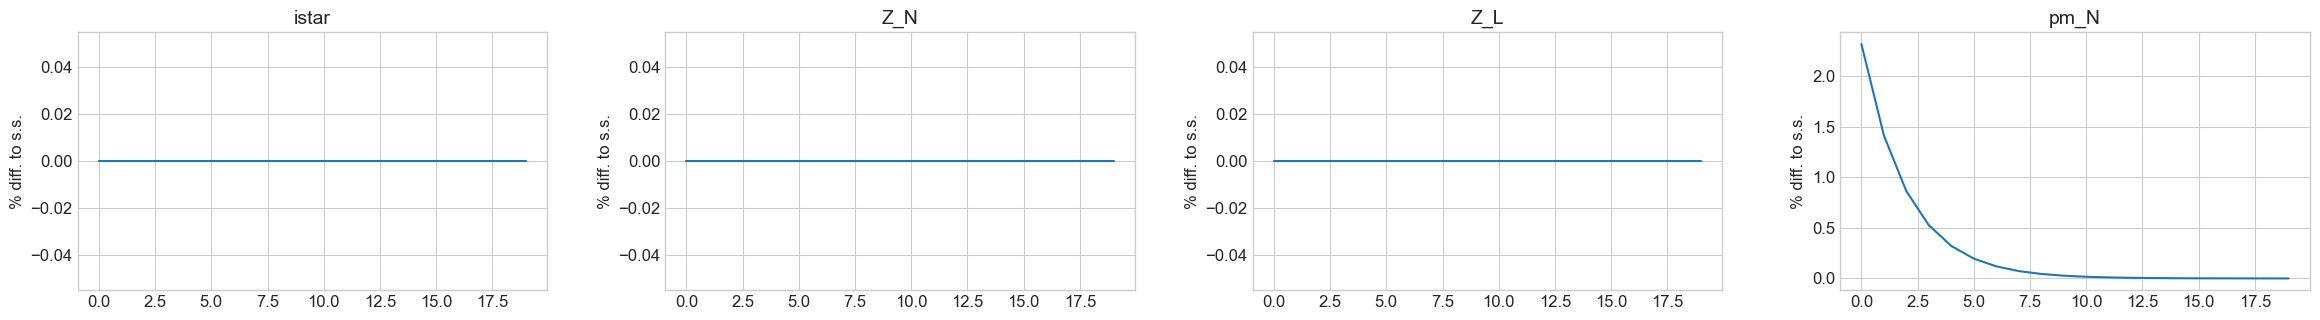


### varnames ###


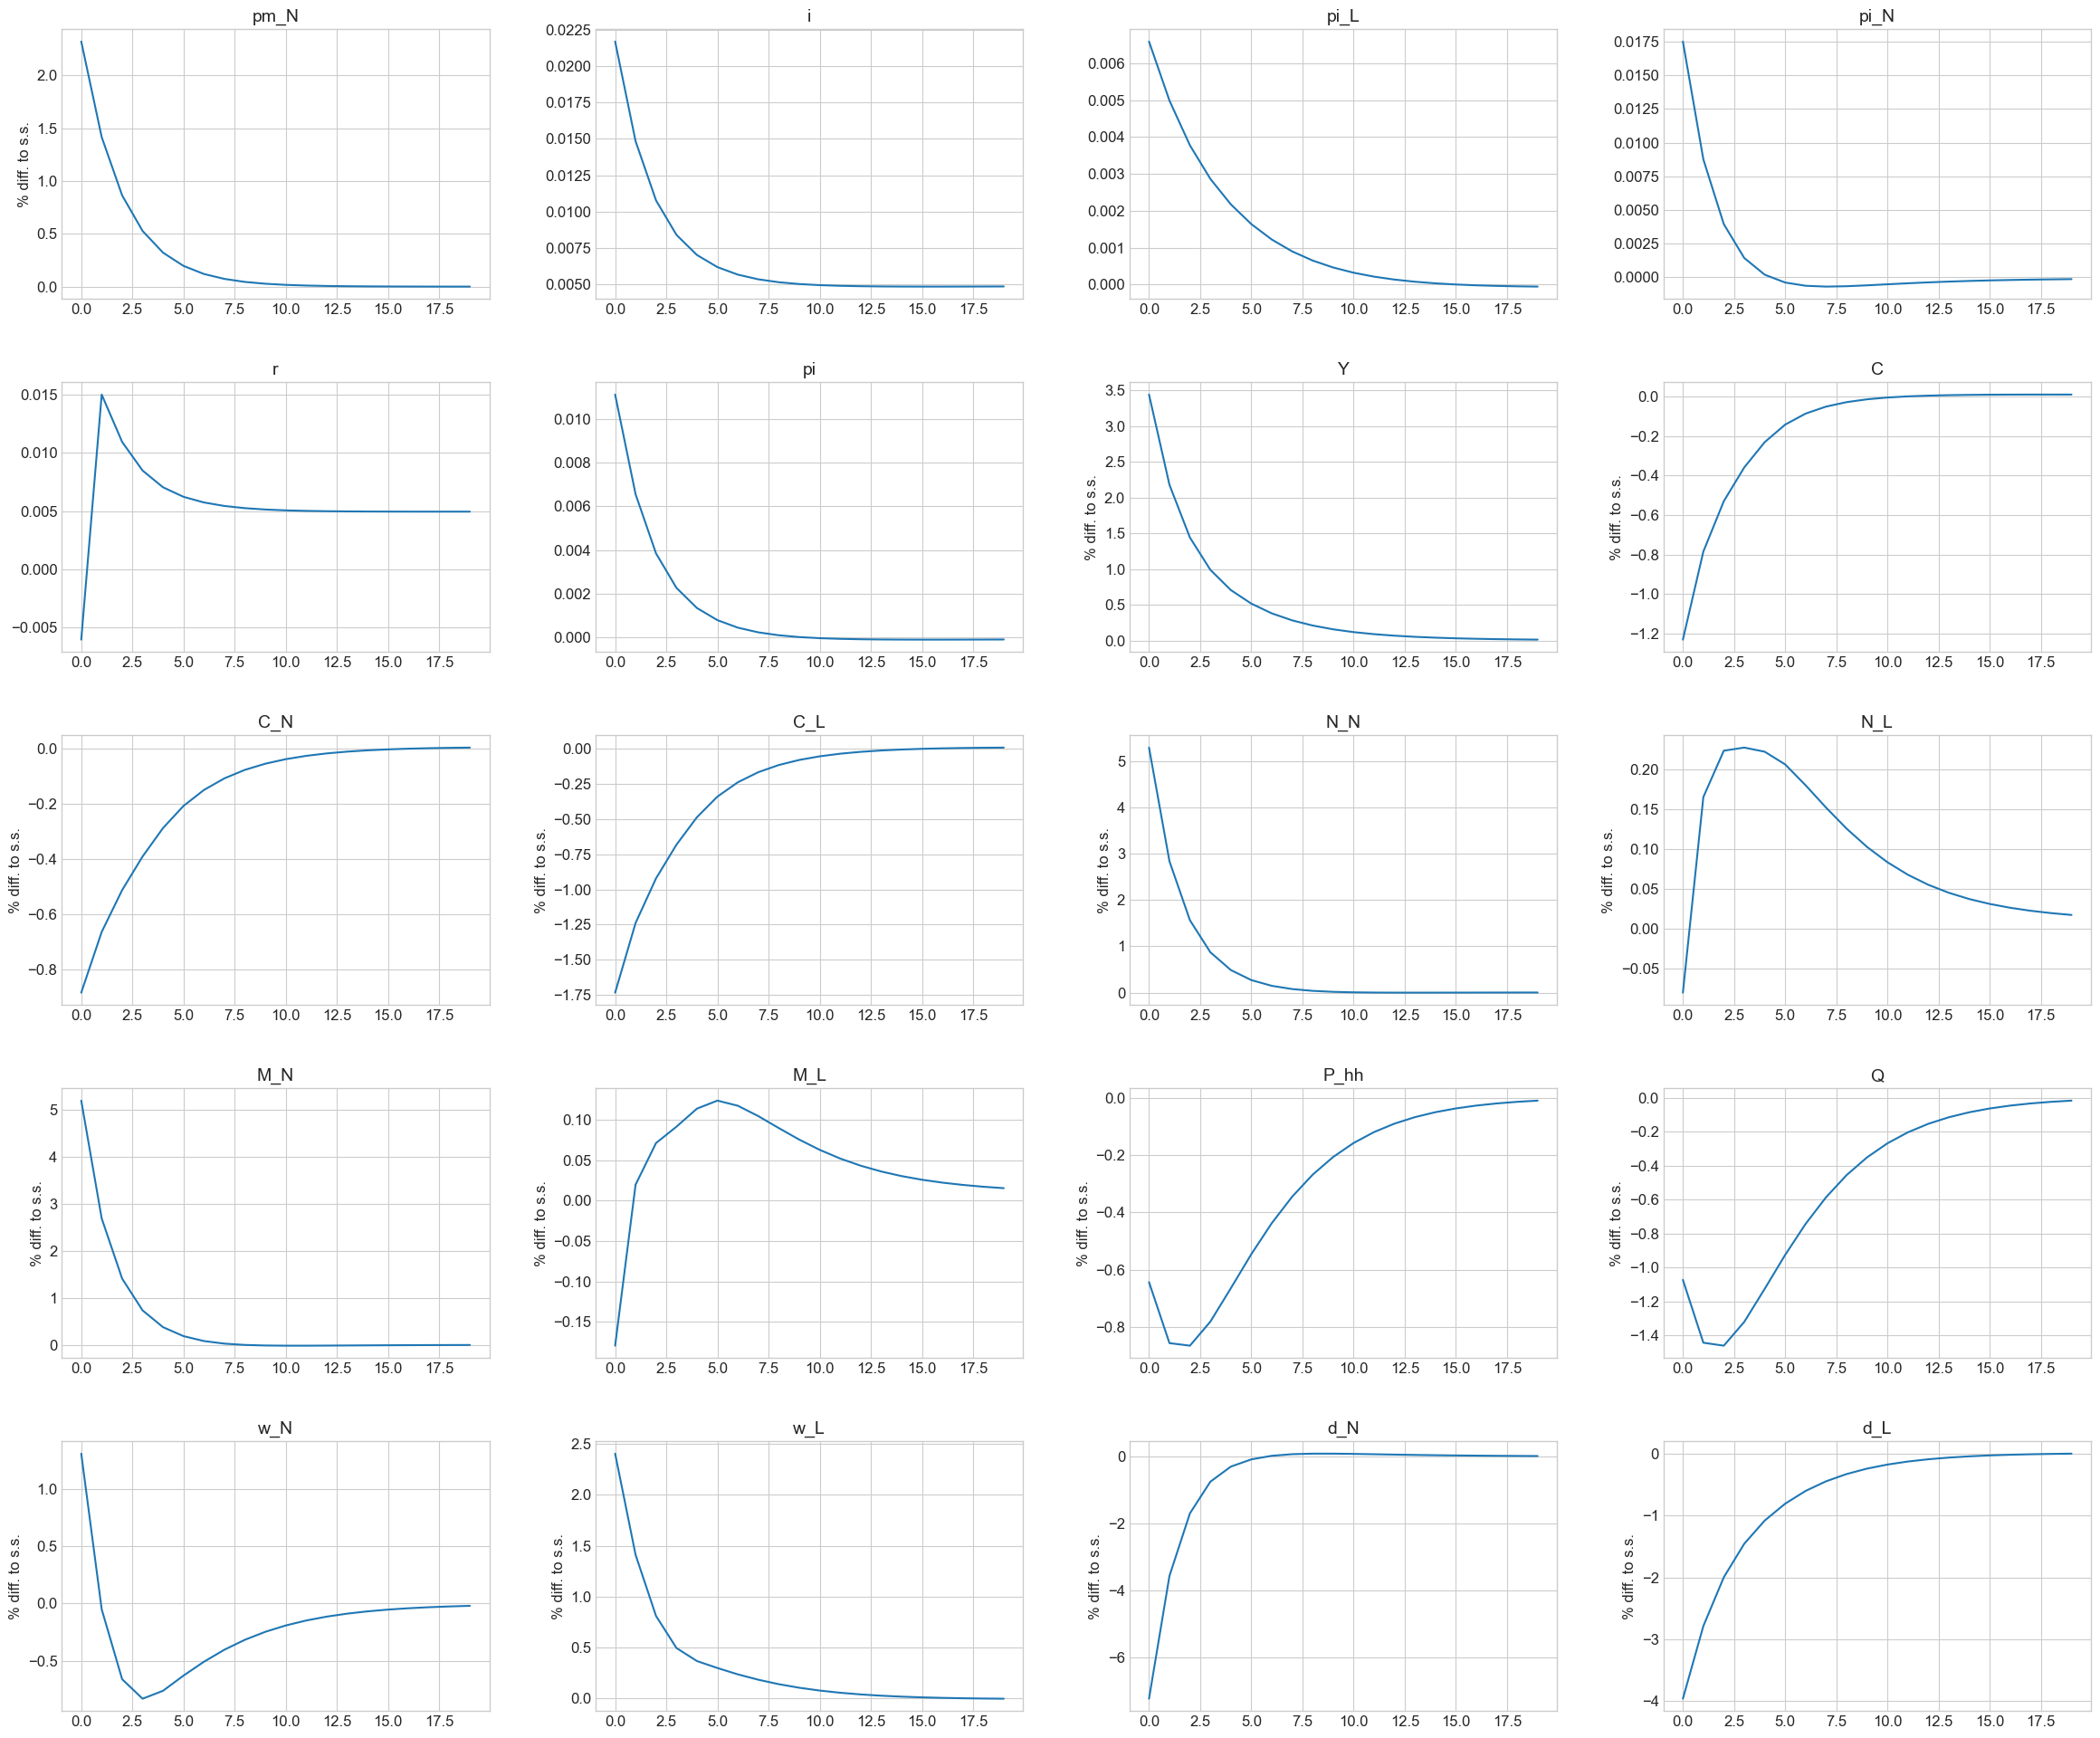


### tagets ###


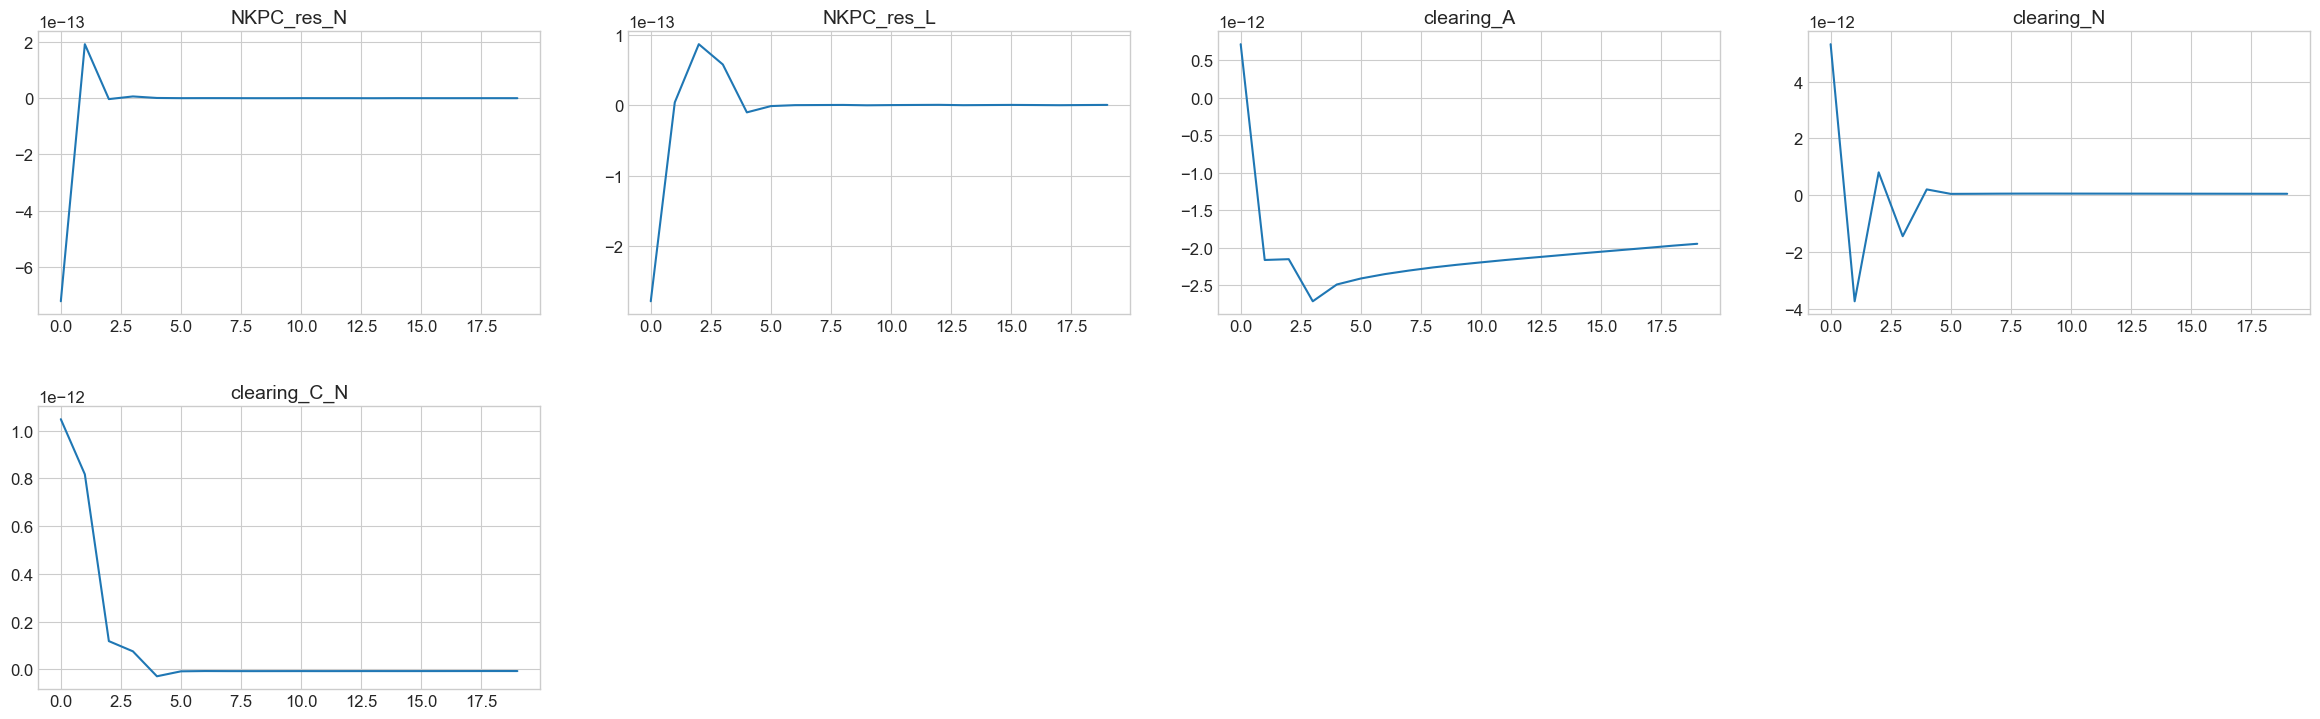

In [30]:
paths = ['pm_N','i','pi_L','pi_N','r','pi','Y','C','C_N','C_L','N_N','N_L','M_N','M_L','P_hh','Q','w_N','w_L','d_N','d_L']
lvl_value = ['i','pi_L','pi_N','r','pi']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=20,ncols=4)

In [61]:
MPC = np.zeros(ss.D.shape)
m_diff = (1+ss.r)*par.a_grid[np.newaxis,np.newaxis,1:]-(1+model.ss.r)*par.a_grid[np.newaxis,np.newaxis,:-1]
MPC[:,:,:-1] = (ss.c[:,:,1:]-ss.c[:,:,:-1])/m_diff
MPC[:,:,-1] = MPC[:,:,-1] # assuming constant MPC at end
mean_MPC = np.sum(MPC*ss.D)
mean_MPC_ann = 1-(1-mean_MPC)**4
print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')

mean MPC: 0.059 [annual: 0.216]


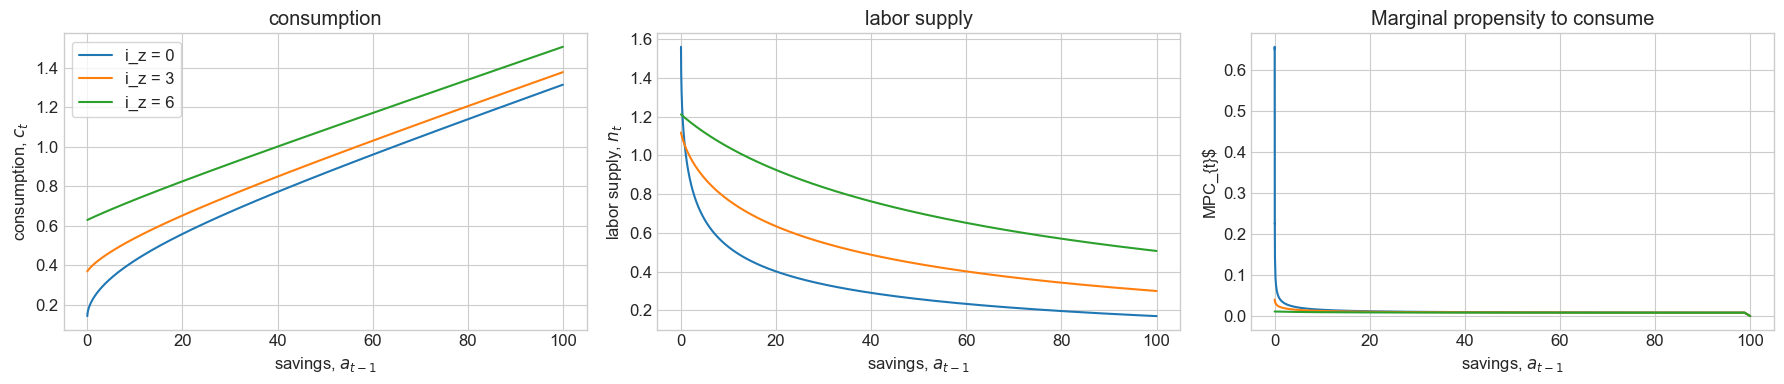

In [71]:
fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 500

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# B. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'labor supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')


# c. MPC
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'Marginal propensity to consume')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],MPC[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('MPC_{t}$')

fig.tight_layout()

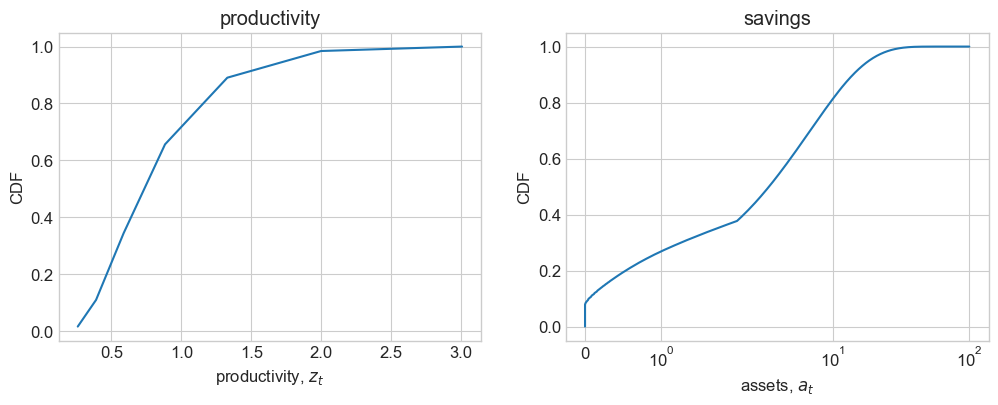

In [43]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D[0],axis=1))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

In [19]:
#model.path.P_hh[0,:]
print(f' C Luxury low   = {np.average(ss.c_L[0,0]):8.4f}')
print(f' C Luxury high   = {np.average(ss.c_L[0,6]):8.4f}')
print(f' C Necessity low   = {np.average(ss.c_N[0,0]):8.4f}')
print(f' C necessity high   = {np.average(ss.c_N[0,6]):8.4f}')
print(f' p low   = {np.average(ss.p[0,0]):8.4f}')
print(f' p high   = {np.average(ss.p[0,6]):8.4f}')
print(f' C   = {ss.C_L_hh, ss.Y_L}')
print(f' C   = {ss.C_N_hh, ss.Y_N}')
print(f'epsilon = {ss.C_N_hh/ss.C_hh}')
ss.C_hh

 C Luxury low   =   0.2602
 C Luxury high   =   0.5163
 C Necessity low   =   0.1874
 C necessity high   =   0.2734
 p low   =   1.0392
 p high   =   1.0500
 C   = (0.27553516024711994, 0.4)
 C   = (0.19253024289155204, 0.62695172406665)
epsilon = 0.41620868185983556


0.4625810351461853

# Step 3b: Find linearized IRFs

In [ ]:
par.jump_pm_N = 0.025
model.find_IRFs(do_print=True)

linear transition path found in 5.3 secs [finding solution matrix: 2.8 secs]


In [ ]:
paths = ['Y','N','N_hh','M_N','M_L','C_N_hh','C_L_hh','C','Q','tau','d_L','d_N','P_hh']
model.show_IRFs(paths,T_max=20,ncols=3,do_linear=True)

In [ ]:
#model_ = model.copy()
#model_.par_phi_y = 1.0
#model_.find_ss
#model_.compute_jacs()
#model_.find_transition_path()

# Step 4. Simulation

In [ ]:
np.random.seed(1917)
model.simulate(do_print=True)

In [ ]:
def model_sim():
    
    fig = plt.figure(figsize=(12,8),dpi=100)

    ax = fig.add_subplot(2,2,1)
    ax.set_title('i')
    ax.plot(ss.i+sim.di,ls='--')
    ax.axhline(ss.i,color='black',zorder=0)

    ax = fig.add_subplot(2,2,2)
    ax.set_title('pi')
    ax.plot(ss.pi+sim.dpi,ls='--',)
    ax.axhline(ss.pi,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,3)
    ax.set_title('r')
    ax.plot(ss.r+sim.dr,ls='--',)
    ax.axhline(ss.r,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,4)
    ax.set_title('C')
    ax.plot(ss.C+sim.dC,ls='--',)
    ax.axhline(ss.C,color='black',zorder=0)
    

In [ ]:
model_sim()